In [ ]:
# Packages required for the code

# For Data visualisation
import pandas as pd
import numpy as np
import seaborn as sns 
from scipy import stats
from scipy.stats import norm,skew
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# Data Preparation
import ast
from collections import Counter
import itertools
import operator
import time
from wordcloud import WordCloud


# For training the model
import os
import xgboost as xgb
import catboost as catb
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, KFold
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [ ]:
# Read the dataset
train = pd.read_csv('fwbo_kaggle_corrected.csv')
test = pd.read_csv('test.csv')
test_1=pd.read_csv('meta_info.csv')

In [3]:
# Remove rows for NAN values present in first week box-office 
train['first_week_box_office'].replace('', np.nan, inplace=True)
train['first_week_box_office'].replace('  ', np.nan, inplace=True)
train.dropna(subset=['first_week_box_office'], inplace=True)

In [4]:
## First dataset shape

In [5]:
train.shape

(2526, 25)

In [6]:
# New dataset 

In [7]:
train_new=pd.read_csv('Added-fwbo.csv')

In [8]:
# Check the columns

In [9]:
train_new.columns

Index(['Unnamed: 0', 'id', 'belongs_to_collection', 'budget', 'genres',
       'homepage', 'imdb_id', 'original_language', 'original_title',
       'overview', 'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew',
       'first_week_box_office'],
      dtype='object')

In [10]:
# Remove unwanted columns

In [11]:
train=train.drop(['Unnamed: 0','poster_path'],axis=1)

In [12]:
train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'runtime', 'spoken_languages', 'status', 'tagline',
       'title', 'Keywords', 'cast', 'crew', 'revenue',
       'first_week_box_office'],
      dtype='object')

In [13]:
train_new=train_new.drop(['Unnamed: 0','poster_path'],axis=1)

In [14]:
# Donot want revenue as well so remove it

In [15]:
train=train.drop(['revenue'],axis=1)

In [16]:
train_new.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'runtime', 'spoken_languages', 'status', 'tagline',
       'title', 'Keywords', 'cast', 'crew', 'first_week_box_office'],
      dtype='object')

In [17]:
# In total we have 6924 values 2526 from first dataset which is not having NAN values

In [18]:
print(train.shape)
print(train_new.shape)

(2526, 22)
(4398, 22)


In [19]:
# Check to remove rows containing NAN values for box-office . Not required step

In [20]:
train_new['first_week_box_office'].replace('', np.nan, inplace=True)
train_new['first_week_box_office'].replace('  ', np.nan, inplace=True)
train_new.dropna(subset=['first_week_box_office'], inplace=True)

In [21]:
train_new.shape

(3600, 22)

In [22]:
train = pd.concat([train, train_new], ignore_index=True, sort =False)

In [23]:
train.shape

(6126, 22)

In [24]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,first_week_box_office
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",5963324.0
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",22956453.0
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",135388.0
3,7,NaN,14000000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",http://www.thepossessionmovie.com/,tt0431021,en,The Possession,A young girl buys an antique box at a yard sal...,7.286477,...,8/30/12,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Fear The Demon That Doesn't Fear God,The Possession,NaN,"[{'cast_id': 23, 'character': 'Clyde', 'credit...","[{'credit_id': '52fe4981c3a368484e12ee29', 'de...",17732480.0
4,8,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,tt0391024,en,Control Room,A chronicle which provides a rare window into ...,1.949044,...,1/15/04,84.0,"[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...",Released,Different channels. Different truths.,Control Room,"[{'id': 917, 'name': 'journalism'}, {'id': 163...","[{'cast_id': 2, 'character': 'Himself', 'credi...","[{'credit_id': '52fe47a69251416c750a0daf', 'de...",27125.0


In [25]:
train.to_csv('Final_training_data.csv')


In [26]:
'''dict_columns = [ 'genres']

def text_to_dict(df):
    for column in dict_columns:
        df[column] = df[column].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x) )
    return df
        
train = text_to_dict(train)'''

"dict_columns = [ 'genres']\n\ndef text_to_dict(df):\n    for column in dict_columns:\n        df[column] = df[column].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x) )\n    return df\n        \ntrain = text_to_dict(train)"

In [27]:
'''list_of_genres = list(train['genres'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
plt.figure(figsize = (12, 8))
text = ' '.join([i for j in list_of_genres for i in j])
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top genres')
plt.axis("off")
plt.show()'''


'list_of_genres = list(train[\'genres\'].apply(lambda x: [i[\'name\'] for i in x] if x != {} else []).values)\nplt.figure(figsize = (12, 8))\ntext = \' \'.join([i for j in list_of_genres for i in j])\nwordcloud = WordCloud(max_font_size=None, background_color=\'white\', collocations=False,\n                      width=1200, height=1000).generate(text)\nplt.imshow(wordcloud)\nplt.title(\'Top genres\')\nplt.axis("off")\nplt.show()'

In [28]:
#plt.bar(train.genres.apply(len).value_counts().sort_index().keys(), train.genres.apply(len).value_counts().sort_index())

In [29]:
#train.first_week_box_office=np.log1p(train.first_week_box_office)

In [30]:
# Distribution of language vs first week office

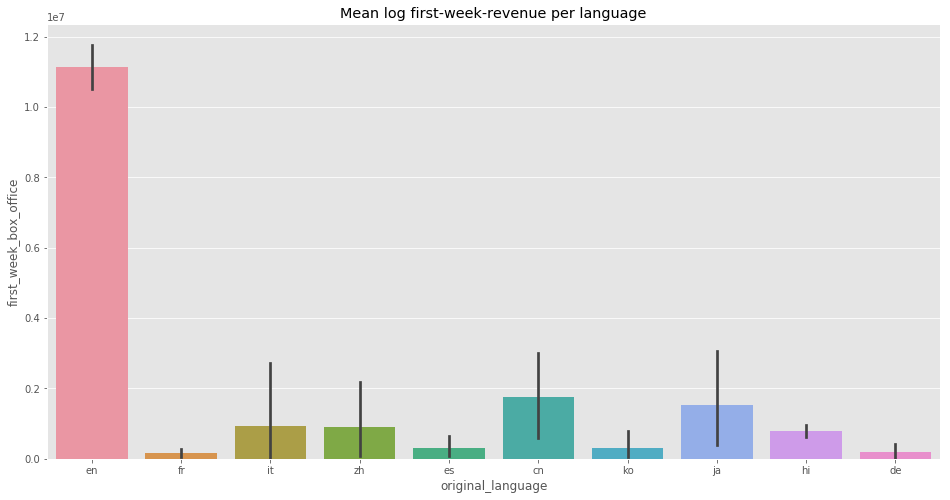

In [31]:
plt.figure(figsize=(16, 8))
#plt.subplot(1, 2, 1)
#sns.boxplot(x='original_language', y='revenue', data=train.loc[train['original_language'].isin(train['original_language'].value_counts().head(10).index)]);
#plt.title('Mean revenue per language');
#plt.subplot(1, 2, 2)
sns.barplot(x='original_language', y='first_week_box_office', data=train.loc[train['original_language'].isin(train['original_language'].value_counts().head(10).index)]);
plt.title('Mean log first-week-revenue per language');

Text(0, 0.5, 'log-first-week-box-office')

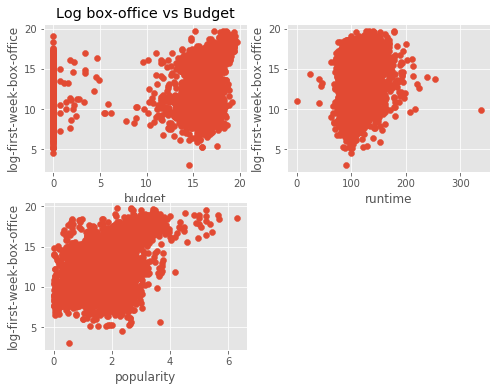

In [32]:
plt.figure(figsize=(8, 6))
plt.subplot(2,2,1)
plt.scatter(np.log1p(train['budget']), np.log1p(train['first_week_box_office']))
plt.xlabel('budget')
plt.ylabel('log-first-week-box-office')
plt.title('Log box-office vs Budget');

plt.subplot(2,2,2)
plt.scatter(train['runtime'], np.log1p(train['first_week_box_office']))
plt.xlabel('runtime')
plt.ylabel('log-first-week-box-office')

plt.subplot(2,2,3)
plt.scatter(np.log1p(train['popularity']), np.log1p(train['first_week_box_office']))
plt.xlabel('popularity')
plt.ylabel('log-first-week-box-office')
#plt.scatter(train['popularity'], train['log_revenue'])
#plt.title('Log Revenue vs popularity');

In [33]:
train.shape

(6126, 22)

In [34]:
#mean_budget = train['budget'].mean(skipna=True)

In [35]:
#type(train['runtime'][0])

In [36]:
#train.loc[train.budget == 0.0, 'budget'] = mean_budget
#print(mean_budget)

In [37]:
#train.loc[train.popularity==0.0,]

In [38]:
train[['first_week_box_office', 'budget', 'runtime']].describe()

,first_week_box_office,budget,runtime
count,6.126000e+03,6.126000e+03,6126.000000
mean,1.014031e+07,2.649475e+07,107.522690
std,2.269233e+07,3.934056e+07,19.311751
min,2.000000e+01,0.000000e+00,0.000000
25%,7.412325e+04,0.000000e+00,94.000000
50%,2.816611e+06,1.200000e+07,104.000000
75%,1.151270e+07,3.500000e+07,117.000000
max,3.802706e+08,3.800000e+08,338.000000


In [39]:
#train.loc[train['id'] == 16,'revenue'] = 192864          # Skinning
train.loc[train['id'] == 90,'budget'] = 30000000         # Sommersby          
train.loc[train['id'] == 118,'budget'] = 60000000        # Wild Hogs
train.loc[train['id'] == 149,'budget'] = 18000000        # Beethoven
#train.loc[train['id'] == 313,'revenue'] = 12000000       # The Cookout 
#train.loc[train['id'] == 451,'revenue'] = 12000000       # Chasing Liberty
train.loc[train['id'] == 464,'budget'] = 20000000        # Parenthood
train.loc[train['id'] == 470,'budget'] = 13000000        # The Karate Kid, Part II
train.loc[train['id'] == 513,'budget'] = 930000          # From Prada to Nada
train.loc[train['id'] == 797,'budget'] = 8000000         # Welcome to Dongmakgol
train.loc[train['id'] == 819,'budget'] = 90000000        # Alvin and the Chipmunks: The Road Chip
train.loc[train['id'] == 850,'budget'] = 90000000        # Modern Times
train.loc[train['id'] == 1112,'budget'] = 7500000        # An Officer and a Gentleman
train.loc[train['id'] == 1131,'budget'] = 4300000        # Smokey and the Bandit   
train.loc[train['id'] == 1359,'budget'] = 10000000       # Stir Crazy 
train.loc[train['id'] == 1542,'budget'] = 1              # All at Once
train.loc[train['id'] == 1542,'budget'] = 15800000       # Crocodile Dundee II
train.loc[train['id'] == 1571,'budget'] = 4000000        # Lady and the Tramp
train.loc[train['id'] == 1714,'budget'] = 46000000       # The Recruit
train.loc[train['id'] == 1721,'budget'] = 17500000       # Cocoon
#train.loc[train['id'] == 1865,'revenue'] = 25000000      # Scooby-Doo 2: Monsters Unleashed
train.loc[train['id'] == 2268,'budget'] = 17500000       # Madea Goes to Jail budget
#train.loc[train['id'] == 2491,'revenue'] = 6800000       # Never Talk to Strangers
train.loc[train['id'] == 2602,'budget'] = 31000000       # Mr. Holland's Opus
train.loc[train['id'] == 2612,'budget'] = 15000000       # Field of Dreams
train.loc[train['id'] == 2696,'budget'] = 10000000       # Nurse 3-D
train.loc[train['id'] == 2801,'budget'] = 10000000       # Fracture

In [40]:
train.loc[train['id'] == 3889,'budget'] = 15000000       # Colossal
train.loc[train['id'] == 6733,'budget'] = 5000000        # The Big Sick
train.loc[train['id'] == 3197,'budget'] = 8000000        # High-Rise
train.loc[train['id'] == 6683,'budget'] = 50000000       # The Pink Panther 2
train.loc[train['id'] == 5704,'budget'] = 4300000        # French Connection II
train.loc[train['id'] == 6109,'budget'] = 281756         # Dogtooth
train.loc[train['id'] == 7242,'budget'] = 10000000       # Addams Family Values
train.loc[train['id'] == 7021,'budget'] = 17540562       #  Two Is a Family
train.loc[train['id'] == 5591,'budget'] = 4000000        # The Orphanage
train.loc[train['id'] == 4282,'budget'] = 20000000       # Big Top Pee-wee

In [41]:
# TRAIN 

train.runtime[train.id == 391] = 86 #Il peor natagle de la meva vida
train.runtime[train.id == 592] = 90 #А поутру они проснулись
train.runtime[train.id == 925] = 95 #¿Quién mató a Bambi?
train.runtime[train.id == 978] = 93 #La peggior settimana della mia vita
train.runtime[train.id == 1256] = 92 #Cipolla Colt
train.runtime[train.id == 1542] = 93 #Все и сразу
train.runtime[train.id == 1875] = 86 #Vermist
train.runtime[train.id == 2151] = 108 #Mechenosets
train.runtime[train.id == 2499] = 108 #Na Igre 2. Novyy Uroven
train.runtime[train.id == 2646] = 98 #同桌的妳
train.runtime[train.id == 2786] = 111 #Revelation
train.runtime[train.id == 2866] = 96 #Tutto tutto niente niente

# TEST
train.runtime[train.id == 4074] = 103 #Shikshanachya Aaicha Gho
train.runtime[train.id == 4222] = 93 #Street Knight
train.runtime[train.id == 4431] = 100 #Плюс один
train.runtime[train.id == 5520] = 86 #Glukhar v kino
train.runtime[train.id == 5845] = 83 #Frau Müller muss weg!
train.runtime[train.id == 5849] = 140 #Shabd
train.runtime[train.id == 6210] = 104 #Le dernier souffle
train.runtime[train.id == 6804] = 145 #Chaahat Ek Nasha..
train.runtime[train.id == 7321] = 87 #El truco del manco

In [42]:
train[['first_week_box_office', 'budget', 'runtime']].describe()

,first_week_box_office,budget,runtime
count,6.126000e+03,6.126000e+03,6126.000000
mean,1.014031e+07,2.659221e+07,107.539667
std,2.269233e+07,3.933524e+07,19.262864
min,2.000000e+01,0.000000e+00,25.000000
25%,7.412325e+04,0.000000e+00,94.000000
50%,2.816611e+06,1.200000e+07,104.000000
75%,1.151270e+07,3.500000e+07,117.000000
max,3.802706e+08,3.800000e+08,338.000000


In [43]:
def visualize_distribution(y):
    sns.distplot(y,fit=norm)
    mu,sigma=norm.fit(y)
    plt.legend(["Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})".format(mu,sigma)])
    plt.title("Distribution of revenue")
    plt.ylabel("Frequency")
    plt.show()
    
    
def visualize_probplot(y):
    stats.probplot(y,plot=plt)
    plt.show()

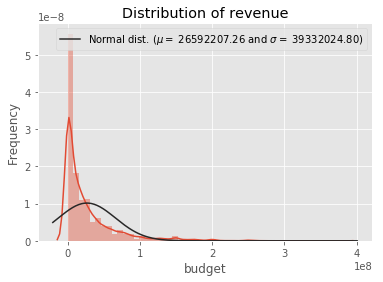

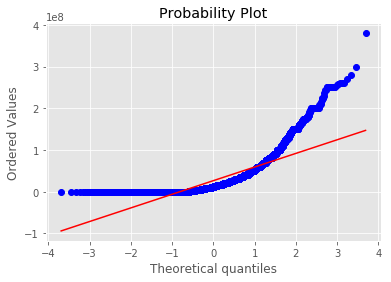

In [44]:
visualize_distribution(train.budget)
visualize_probplot(train.budget)

In [45]:
train['budget'] = np.log1p(train['budget'])
test['budget'] = np.log1p(test['budget'])

train['popularity'] = np.log1p(train['popularity'])
test['popularity'] = np.log1p(test['popularity'])

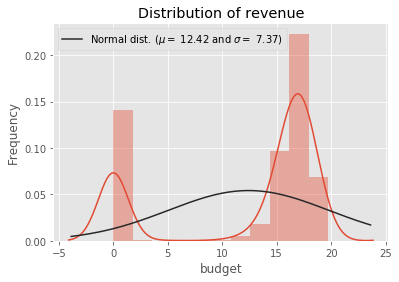

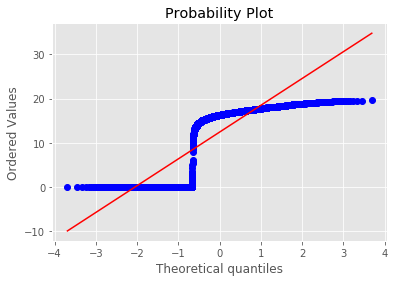

In [46]:
visualize_distribution(train.budget)
visualize_probplot(train.budget)

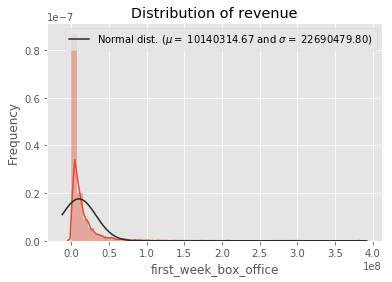

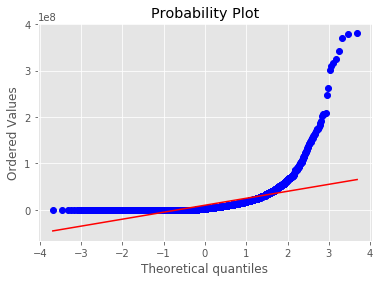

In [47]:
visualize_distribution(train.first_week_box_office)
visualize_probplot(train.first_week_box_office)

In [48]:
train['first_week_box_office']=np.log1p(train['first_week_box_office'])

In [49]:
train['first_week_box_office'][0]

15.601138769387084

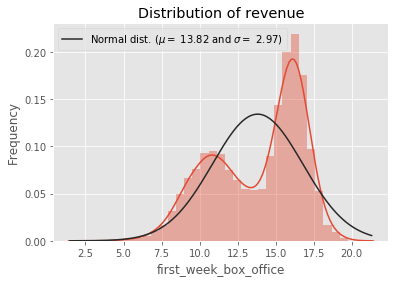

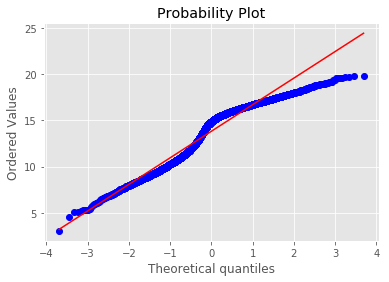

In [50]:
visualize_distribution(train.first_week_box_office)
visualize_probplot(train.first_week_box_office)

In [51]:
#train.loc[train["cast"].notnull(),"cast"]=train.loc[train["cast"].notnull(),"cast"].apply(lambda x : ast.literal_eval(x))
#train.loc[train["crew"].notnull(),"crew"]=train.loc[train["crew"].notnull(),"crew"].apply(lambda x : ast.literal_eval(x))

In [52]:
(train['budget']==0.0).astype(int).sum()
mean_budget=train['budget'].mean(skipna=True)

In [53]:
train['budget']=train.budget.mask(train.budget == 0,mean_budget)
(train['budget']==0.0).astype(int).sum()
                                  

0

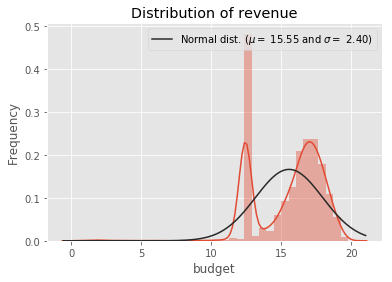

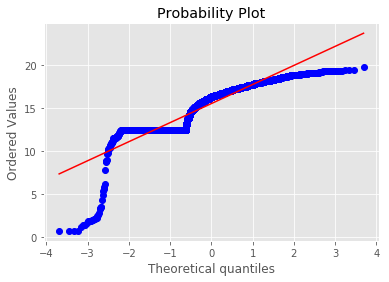

In [54]:
visualize_distribution(train.budget)
visualize_probplot(train.budget)

In [55]:
(train['runtime']==0.0).astype(int).sum()

0

In [56]:
# Convert  Cast and Crew to dictionary which can be used to extract cast and crew scores

In [57]:
# from this kernel: https://www.kaggle.com/gravix/gradient-in-a-box
dict_columns = ['cast', 'crew']

def text_to_dict(df):
    for column in dict_columns:
        df[column] = df[column].apply(lambda x: {} if pd.isnull(x) else ast.literal_eval(x) )
    return df

In [58]:
train=text_to_dict(train)

In [59]:
list_of_cast_names = list(train['cast'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
val=Counter([i for j in list_of_cast_names for i in j]).most_common(500)

In [60]:
lst2 = [item[0] for item in val]

In [61]:
print(lst2)

['Samuel L. Jackson', 'Robert De Niro', 'Morgan Freeman', 'Bruce Willis', 'Liam Neeson', 'Steve Buscemi', 'Willem Dafoe', 'Nicolas Cage', 'Matt Damon', 'John Goodman', 'Robin Williams', 'J.K. Simmons', 'Julianne Moore', 'Johnny Depp', 'Stanley Tucci', 'Richard Jenkins', 'Ben Stiller', 'Christopher Walken', 'Tom Hanks', 'Brad Pitt', 'John Leguizamo', 'Bill Murray', 'Sylvester Stallone', 'James Franco', 'Keith David', 'Woody Harrelson', 'Dennis Quaid', 'Owen Wilson', 'Paul Giamatti', 'Ben Affleck', 'Susan Sarandon', 'Tom Cruise', 'Forest Whitaker', 'John Turturro', 'Ben Kingsley', 'Alec Baldwin', 'Frank Welker', 'Kevin Costner', 'Dustin Hoffman', 'Denzel Washington', 'William H. Macy', 'Robert Downey Jr.', 'Ewan McGregor', 'Kevin Bacon', 'Antonio Banderas', 'John Cusack', 'Brendan Gleeson', 'Harrison Ford', 'Michael Shannon', 'Julia Roberts', 'John C. Reilly', 'Danny Glover', 'Nicole Kidman', 'Dan Aykroyd', 'Justin Long', 'Sigourney Weaver', 'Philip Seymour Hoffman', 'Brian Cox', 'Michae

In [62]:
train['first_week_box_office'].replace('', np.nan, inplace=True)
train['first_week_box_office'].replace('  ', np.nan, inplace=True)
train.dropna(subset=['first_week_box_office'], inplace=True)
#train=train.drop(['cast_score'],axis=1)

In [63]:
# Creating cast_score based on popular cast list

In [64]:
for temp,ii,box_office_val in zip(train['cast'],train['id'],train['first_week_box_office']):
    myvalues = [i['name'] for i in temp if 'name' in i]
    
    pop_actor=list(set(lst2).intersection(set(myvalues)))
    train.loc[train['id']==ii,'cast_score']=len(pop_actor)

Text(0, 0.5, 'log-first-week-box-office')

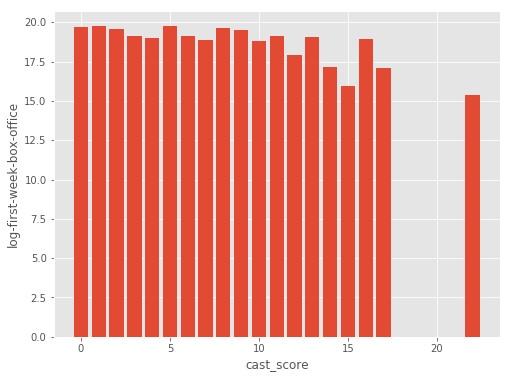

In [65]:
plt.figure(figsize=(8, 6))
plt.bar(train['cast_score'], train['first_week_box_office'])
plt.xlabel('cast_score')
plt.ylabel('log-first-week-box-office')

In [66]:
# Check correlation of cast score with first week box office

In [67]:
corr_cast=train['cast_score'].corr(train['first_week_box_office'])

In [68]:
corr_cast

0.3660261226360388

In [69]:
# Create popular crew_list 

In [70]:
list_of_crew_names = list(train['crew'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
val_crew=Counter([i for j in list_of_crew_names for i in j]).most_common(500)

In [71]:
lst2_crew = [item[0] for item in val_crew]

In [72]:
print(lst2_crew)

['Avy Kaufman', 'Steven Spielberg', 'Robert Rodriguez', 'Mary Vernieu', 'Deborah Aquila', 'Bob Weinstein', 'Hans Zimmer', 'Harvey Weinstein', 'James Newton Howard', 'Tricia Wood', 'James Horner', 'Francine Maisler', 'Kerry Barden', 'Alan Silvestri', 'Danny Elfman', 'John Williams', 'Billy Hopkins', 'Suzanne Smith', "Dan O'Connell", 'Luc Besson', 'Jerry Goldsmith', 'Arnon Milchan', 'Scott Rudin', 'John Papsidera', 'Marco Beltrami', 'Mark Isham', 'Bruce Berman', 'John Debney', 'Ridley Scott', 'Brian Grazer', 'Joel Silver', 'Christophe Beck', 'Denise Chamian', 'Graeme Revell', 'Tim Bevan', 'Clint Eastwood', 'Kevin Kaska', 'Eric Fellner', 'Carter Burwell', 'Jane Jenkins', 'Stan Lee', 'Sarah Finn', 'Steven Soderbergh', 'Janet Hirshenson', 'Christopher Young', 'John Hughes', 'Mindy Marin', 'Hans Bjerno', 'John Powell', 'Bill Corso', 'John T. Cucci', 'Debra Zane', 'Ve Neill', 'Howard Shore', 'Joel Coen', 'J.J. Makaro', 'Thomas Newman', 'Ronna Kress', 'Nina Gold', 'Jina Jay', 'Frank Marshall',

In [73]:
for temp_crew,ii_crew,box_office_val in zip(train['crew'],train['id'],train['first_week_box_office']):
    myvalues_crew = [i['name'] for i in temp_crew if 'name' in i]
    
    pop_crew=list(set(lst2_crew).intersection(set(myvalues_crew)))
    train.loc[train['id']==ii_crew,'crew_score']=len(pop_crew)

Text(0, 0.5, 'log-first-week-box-office')

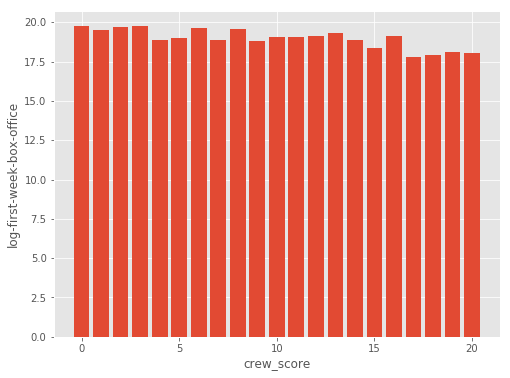

In [74]:
plt.figure(figsize=(8, 6))
plt.bar(train['crew_score'], train['first_week_box_office'])
plt.xlabel('crew_score')
plt.ylabel('log-first-week-box-office')

In [75]:
corr_crew=train['crew_score'].corr(train['first_week_box_office'])
corr_crew

0.42853030032838635

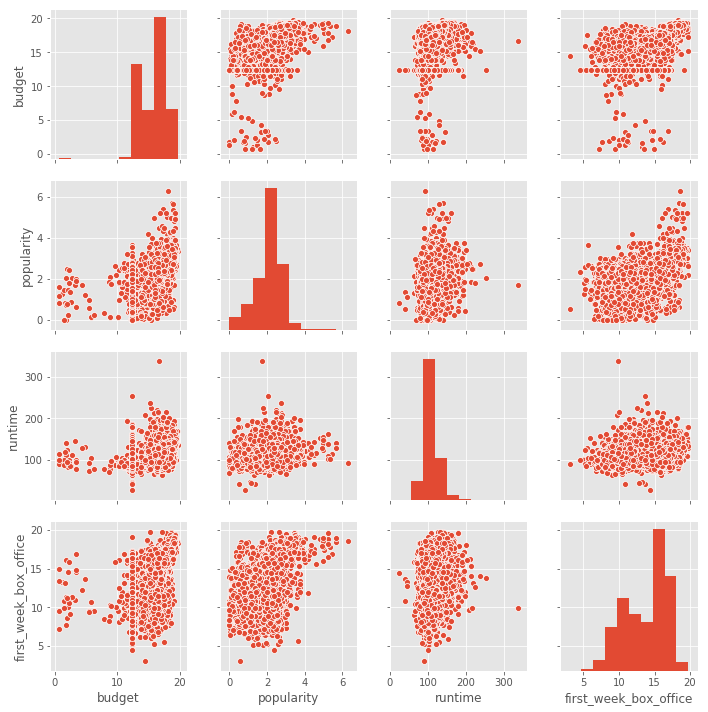

In [76]:
f = ['budget', 'popularity', 'runtime', 'first_week_box_office']
sns.pairplot(train[f].dropna())

In [77]:
train['spoken_languages'] = train['spoken_languages'].apply(lambda x: list(map(lambda d: list(d.values())[0], ast.literal_eval(x)) if isinstance(x, str) else []))

In [78]:
train['nb_spoken_languages'] = train.spoken_languages.apply(len)

In [79]:
train['english_spoken'] = train.spoken_languages.apply(lambda x: 'en' in x)

In [80]:
all_languages = pd.concat([train.original_language], axis=0).value_counts()
all_languages[all_languages > 10]

en    5542
fr     153
hi      85
ja      53
es      49
zh      35
de      32
it      26
ko      24
cn      21
da      12
ru      11
Name: original_language, dtype: int64

In [81]:
main_languages = list(all_languages[all_languages>20].index)
# Let's categorize them, and add a 'other' catergorie
dict_language = dict(zip(main_languages, range(1, len(main_languages)+1)))
dict_language['other'] = 0

#keep only the languages that are on main_languages
train.original_language = train.original_language.apply(lambda x: x if x in main_languages else 'other')
#test.original_language = test.original_language.apply(lambda x: x if x in main_languages else 'other')

#put languages to numeric according to the indexes of the dictionary
train['language'] = train.original_language.apply(lambda x: dict_language[x])
#test['language'] = test.original_language.apply(lambda x: dict_language[x])

In [82]:
main_languages

['en', 'fr', 'hi', 'ja', 'es', 'zh', 'de', 'it', 'ko', 'cn']

In [83]:
#train.genres = train.genres.apply(lambda x: list(map(lambda d: list(d.values())[1], ast.literal_eval(x)) if isinstance(x, str) else []))
#test.genres = test.genres.apply(lambda x: list(map(lambda d: list(d.values())[1], ast.literal_eval(x)) if isinstance(x, str) else []))

train.genres.head()

0                       [{'id': 35, 'name': 'Comedy'}]
1    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
2                        [{'id': 18, 'name': 'Drama'}]
3    [{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...
4                  [{'id': 99, 'name': 'Documentary'}]
Name: genres, dtype: object

In [84]:
#genres = Counter(list(itertools.chain.from_iterable((train['genres'][1]))))
#st_of_genres = list(train['genres'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
train.genres = train.genres.apply(lambda x: list(map(lambda d: list(d.values())[1], ast.literal_eval(x)) if isinstance(x, str) else []))


In [85]:
genres = Counter(itertools.chain.from_iterable((train.genres.values)))
genres

Counter({'Comedy': 2200,
         'Drama': 3042,
         'Family': 599,
         'Romance': 1174,
         'Horror': 618,
         'Thriller': 1616,
         'Documentary': 205,
         'Action': 1431,
         'Music': 214,
         'Adventure': 934,
         'Crime': 920,
         'Science Fiction': 623,
         'Mystery': 463,
         'Foreign': 50,
         'Animation': 312,
         'Fantasy': 550,
         'War': 176,
         'Western': 65,
         'History': 220})

In [86]:
%%time
temp_train = train[['id', 'genres']]
#temp_test = test[['id', 'genres']]
#temp_test_1=test_1[['genres']]

for g in genres:
    temp_train[g] = temp_train.genres.apply(lambda x: 1 if g in x else 0)
    #temp_test[g] = temp_test.genres.apply(lambda x: 1 if g in x else 0)
    #temp_test_1[g] = temp_test_1.genres.apply(lambda x: 1 if g in x else 0)
    
    
X_train = temp_train.drop(['genres', 'id'], axis=1).values
#X_test = temp_test.drop(['genres', 'id'], axis=1).values
#X_test_1 = temp_test_1.drop(['genres'], axis=1).values

# Number of features we want for genres
n_comp_genres = 3

# Build the SVD pipeline
svd = make_pipeline(
    TruncatedSVD(n_components=n_comp_genres),
    Normalizer(norm='l2', copy=False)
)

# Here are our new features
f_train = svd.fit_transform(X_train)
#f_test = svd.transform(X_test)
#f_test_1=svd.transform(X_test_1)

CPU times: user 7.34 s, sys: 58.7 ms, total: 7.4 s
Wall time: 7.31 s


In [87]:
train = pd.concat([train, temp_train.iloc[:,1:]], axis=1)

In [88]:
train.production_companies = train.production_companies.apply(lambda x: list(map(lambda d: list(d.values())[0], ast.literal_eval(x)) if isinstance(x, str) else []))
#test.production_companies = test.production_companies.apply(lambda x: list(map(lambda d: list(d.values())[0], ast.literal_eval(x)) if isinstance(x, str) else [])

In [89]:
train.production_companies[:10]

0    [Paramount Pictures, United Artists, Metro-Gol...
1                               [Walt Disney Pictures]
2    [Bold Films, Blumhouse Productions, Right of W...
3        [Ghost House Pictures, North Box Productions]
4                                                   []
5    [Walt Disney Pictures, Jim Henson Productions,...
6                          [Castle Rock Entertainment]
7    [Twentieth Century Fox Film Corporation, Amerc...
8                [DreamWorks SKG, Jinks/Cohen Company]
9    [Double Feature Films, Jersey Films, Nina Saxo...
Name: production_companies, dtype: object

In [90]:
production_companies = Counter(itertools.chain.from_iterable((train.production_companies.values)))
print("Number of different production companies:", len(production_companies))

Number of different production companies: 6102


In [91]:
train['nb_production_companies'] = train.production_companies.apply(len)
#test['nb_production_companies'] = test.production_companies.apply(len)

In [92]:
%%time
print('Applying SVD on production companies to create reduced features')

# Factorizing all the little production companies into an 'other' variable
big_companies = [p for p in production_companies if production_companies[p] > 30]

Applying SVD on production companies to create reduced features
CPU times: user 2.17 ms, sys: 192 µs, total: 2.36 ms
Wall time: 2.33 ms


In [93]:
big_companies

['Paramount Pictures',
 'United Artists',
 'Metro-Goldwyn-Mayer (MGM)',
 'Walt Disney Pictures',
 'Castle Rock Entertainment',
 'Twentieth Century Fox Film Corporation',
 'DreamWorks SKG',
 'Amblin Entertainment',
 'BBC Films',
 'UK Film Council',
 'Canal+',
 'New Line Cinema',
 'Universal Pictures',
 'Summit Entertainment',
 'Warner Bros.',
 'Columbia Pictures Corporation',
 'Lakeshore Entertainment',
 'The Weinstein Company',
 'TriStar Pictures',
 'Columbia Pictures',
 'Hollywood Pictures',
 'PolyGram Filmed Entertainment',
 'Imagine Entertainment',
 'Touchstone Pictures',
 'Orion Pictures',
 'Epsilon Motion Pictures',
 'Regency Enterprises',
 'Miramax Films',
 'Ciné+',
 'Revolution Studios',
 'Silver Pictures',
 'Fox Searchlight Pictures',
 'StudioCanal',
 'Legendary Pictures',
 'Morgan Creek Productions',
 'Village Roadshow Pictures',
 'Screen Gems',
 'Original Film',
 'Lionsgate',
 'Dimension Films',
 'Dune Entertainment',
 'New Regency Pictures',
 'Relativity Media',
 'Millennium

In [94]:

train.production_companies = train.production_companies.apply(lambda l: list(map(lambda x: x if x in big_companies else 'other', l)))

temp_train = train[['id', 'production_companies']]
#temp_test = test[['id', 'production_companies']]

for p in big_companies + ['other']:
    temp_train[p] = temp_train.production_companies.apply(lambda x: 1 if p in x else 0)
    #temp_test[p] = temp_test.production_companies.apply(lambda x: 1 if p in x else 0)
    
X_train = temp_train.drop(['production_companies', 'id'], axis=1).values
#X_test = temp_test.drop(['production_companies', 'id'], axis=1).values

# Number of features we want for genres
n_comp_production_companies = 3

# Build the SVD pipeline
svd = make_pipeline(
    TruncatedSVD(n_components=n_comp_production_companies),
    Normalizer(norm='l2', copy=False)
)

# Here are our new features
f_train = svd.fit_transform(X_train)
#f_test = svd.transform(X_test)

for i in range(n_comp_production_companies):
    train['production_companies_reduced_{}'.format(i)] = f_train[:, i]
    #test['production_companies_reduced_{}'.format(i)] = f_test[:, i]

In [95]:
train[['production_companies_reduced_0', 'production_companies_reduced_1', 'production_companies_reduced_2']].head(3)

,production_companies_reduced_0,production_companies_reduced_1,production_companies_reduced_2
0,0.365668,-0.195038,-0.910081
1,0.553543,-0.193859,-0.809943
2,0.996820,-0.020414,-0.077025


In [96]:
train.production_countries = train.production_countries.apply(lambda x: list(map(lambda d: list(d.values())[0], ast.literal_eval(x)) if isinstance(x, str) else []))
#test.production_countries = test.production_countries.apply(lambda x: list(map(lambda d: list(d.values())[0], ast.literal_eval(x)) if isinstance(x, str) else []))

In [97]:
train.production_countries[0:10]

0        [US]
1        [US]
2        [US]
3    [US, CA]
4          []
5        [US]
6        [US]
7        [US]
8        [US]
9        [US]
Name: production_countries, dtype: object

In [98]:
production_countries = Counter(itertools.chain.from_iterable(train.production_countries.values))
print("Number of different production companies:", len(production_countries))

Number of different production companies: 93


In [99]:
%%time
print('Applying SVD on production countries to create reduced features')

# Factorizing all the little production companies into an 'other' variable
big_countries = [p for p in production_countries if production_countries[p] > 30]

Applying SVD on production countries to create reduced features
CPU times: user 71 µs, sys: 5 µs, total: 76 µs
Wall time: 62.7 µs


In [100]:
big_countries

['US',
 'CA',
 'GB',
 'DE',
 'FR',
 'NZ',
 'JP',
 'IE',
 'IT',
 'CN',
 'HK',
 'AU',
 'SE',
 'NL',
 'IN',
 'ES',
 'BE',
 'MX',
 'DK']

In [101]:
%%time
print('Applying SVD on production countries to create reduced features')

# Factorizing all the little production companies into an 'other' variable
big_countries = [p for p in production_countries if production_countries[p] > 30]
train.production_countries = train.production_countries.apply(lambda l: list(map(lambda x: x if x in big_countries else 'other', l)))

temp_train = train[['id', 'production_countries']]
#temp_test = test[['id', 'production_countries']]

for p in big_countries + ['other']:
    temp_train[p] = temp_train.production_countries.apply(lambda x: 1 if p in x else 0)
    #temp_test[p] = temp_test.production_countries.apply(lambda x: 1 if p in x else 0)
    
X_train = temp_train.drop(['production_countries', 'id'], axis=1).values
#X_test = temp_test.drop(['production_countries', 'id'], axis=1).values

# Number of features we want for genres
n_comp_production_countries = 3

# Build the SVD pipeline
svd = make_pipeline(
    TruncatedSVD(n_components=n_comp_production_countries),
    Normalizer(norm='l2', copy=False)
)

# Here are our new features
f_train = svd.fit_transform(X_train)
#f_test = svd.transform(X_test)

for i in range(n_comp_production_countries):
    train['production_countries_reduced_{}'.format(i)] = f_train[:, i]
    #test['production_countries_reduced_{}'.format(i)] = f_test[:, i]

Applying SVD on production countries to create reduced features
CPU times: user 7.71 s, sys: 50.6 ms, total: 7.76 s
Wall time: 7.69 s


In [102]:
train[['production_countries_reduced_0', 'production_countries_reduced_1', 'production_countries_reduced_2']].head(3)

,production_countries_reduced_0,production_countries_reduced_1,production_countries_reduced_2
0,0.98976,-0.142695,-0.003722
1,0.98976,-0.142695,-0.003722
2,0.98976,-0.142695,-0.003722


In [103]:
train.loc[train.release_date.isna(), 'release_date'] = '05/01/00'

In [104]:
#Train
train['release_date'] = pd.to_datetime(train['release_date'], format='%m/%d/%y')
train['Year'] = train.release_date.dt.year
train['Month'] = train.release_date.dt.month
train['Day'] = train.release_date.dt.day
train['dayofweek'] = train.release_date.dt.dayofweek 
train['quarter'] = train.release_date.dt.quarter   



In [105]:
#print(train['Month4'])
pd.get_dummies(train['Month'] ,drop_first=True).rename(columns=lambda x: 'Month' + str(int(x)))

,Month2,Month3,Month4,Month5,Month6,Month7,Month8,Month9,Month10,Month11,Month12
0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0,0
9,0,1,0,0,0,0,0,0,0,0,0


In [106]:
ddow = pd.get_dummies(train['dayofweek'],drop_first=True).rename(columns=lambda x: 'dayofweek' + str(x))
ddow

,dayofweek1,dayofweek2,dayofweek3,dayofweek4,dayofweek5,dayofweek6
0,0,0,0,1,0,0
1,0,0,0,1,0,0
2,0,0,0,1,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0
5,0,0,0,1,0,0
6,0,1,0,0,0,0
7,0,0,0,1,0,0
8,0,1,0,0,0,0
9,0,0,0,1,0,0


In [107]:
dummies = pd.get_dummies(train['Month'] ,drop_first=True).rename(columns=lambda x: 'Month' + str(x))
#dummies2 = pd.get_dummies(test['Month'] ,drop_first=True).rename(columns=lambda x: 'Month' + str(int(x)))
train = pd.concat([train, dummies], axis=1)
#test = pd.concat([test, dummies2], axis = 1)
ddow = pd.get_dummies(train['dayofweek'] ,drop_first=True).rename(columns=lambda x: 'dayofweek' + str(x))
#ddow2 = pd.get_dummies(test['dayofweek'] ,drop_first=True).rename(columns=lambda x: 'dayofweek' + str(int(x)))
train = pd.concat([train, ddow], axis=1)
#test = pd.concat([test, ddow2], axis = 1)


In [108]:
#print(train['Month4'])

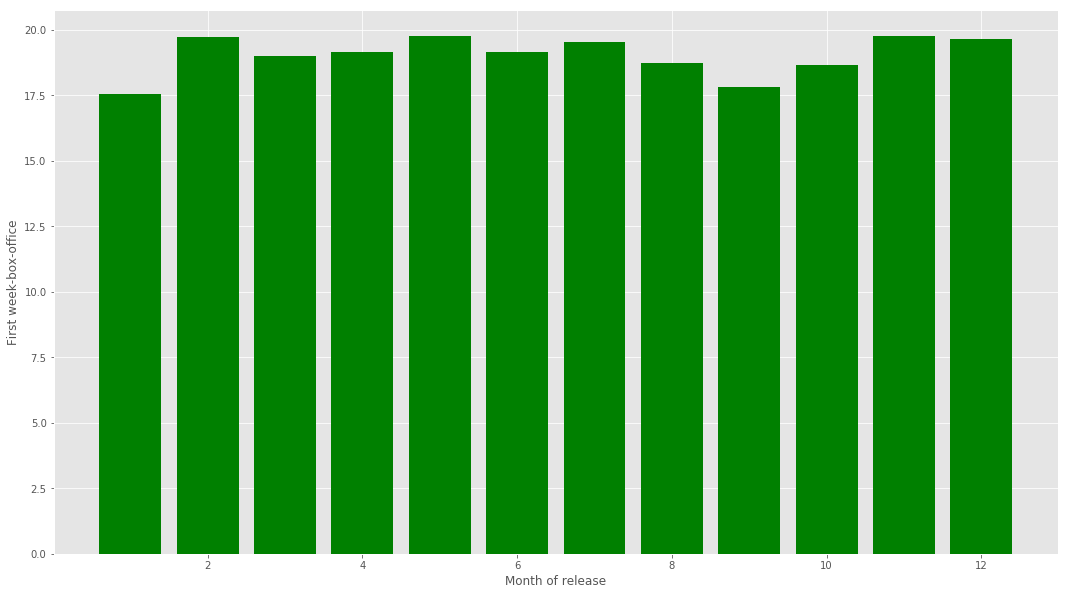

In [109]:
f,ax = plt.subplots(figsize=(18, 10))
plt.bar(train.Month, train.first_week_box_office, color = 'green')
plt.xlabel("Month of release")
plt.ylabel("First week-box-office")
plt.show()

In [110]:
train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'runtime', 'spoken_languages', 'status', 'tagline',
       'title', 'Keywords', 'cast', 'crew', 'first_week_box_office',
       'cast_score', 'crew_score', 'nb_spoken_languages', 'english_spoken',
       'language', 'genres', 'Comedy', 'Drama', 'Family', 'Romance', 'Horror',
       'Thriller', 'Documentary', 'Action', 'Music', 'Adventure', 'Crime',
       'Science Fiction', 'Mystery', 'Foreign', 'Animation', 'Fantasy', 'War',
       'Western', 'History', 'nb_production_companies',
       'production_companies_reduced_0', 'production_companies_reduced_1',
       'production_companies_reduced_2', 'production_countries_reduced_0',
       'production_countries_reduced_1', 'production_countries_reduced_2',
       'Year', 'Month', 'Day', 'dayofweek', 'quarter', 'Mo

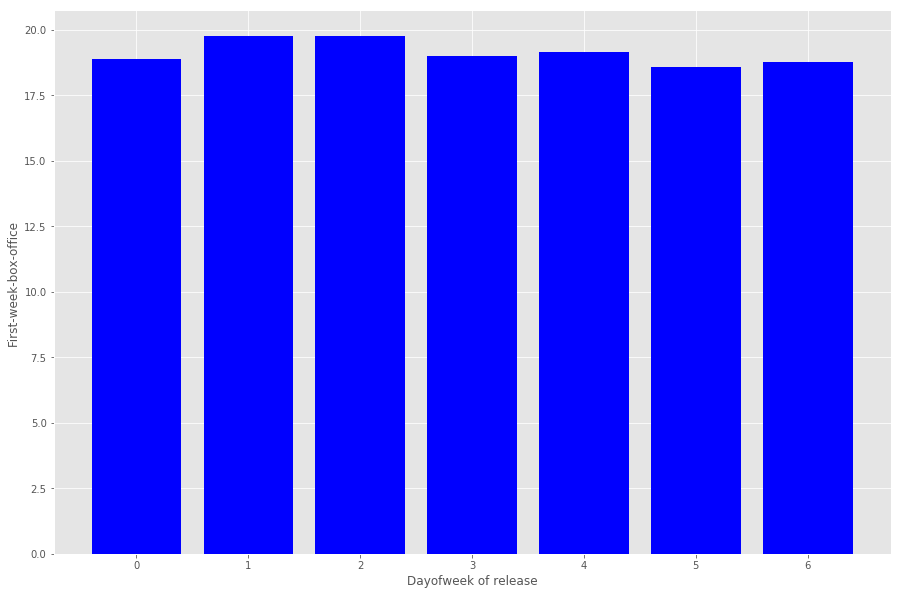

In [111]:
#print(train['dayofweek'])
f,ax = plt.subplots(figsize=(15, 10))
plt.bar(train.dayofweek, train.first_week_box_office, color = 'blue')
plt.xlabel("Dayofweek of release")
plt.ylabel("First-week-box-office")
plt.show()

In [112]:
#dummies = pd.get_dummies(train['Month'] ,drop_first=True).rename(columns=lambda x: 'Month' + str(x))

#dummies2 = pd.get_dummies(test['Month'] ,drop_first=True).rename(columns=lambda x: 'Month' + str(int(x)))
#train = pd.concat([train, dummies], axis=1)
#test = pd.concat([test, dummies2], axis = 1)

In [113]:
#ddow = pd.get_dummies(train['dayofweek'] ,drop_first=True).rename(columns=lambda x: 'dayofweek' + str(x))
#ddow2 = pd.get_dummies(test['dayofweek'] ,drop_first=True).rename(columns=lambda x: 'dayofweek' + str(int(x)))
#train = pd.concat([train, ddow], axis=1)
#test = pd.concat([test, ddow2], axis = 1)

In [114]:
#Train
train.loc[train['Year'] > 2019, 'Year'] = train.loc[train['Year'] > 2019, 'Year'].apply(lambda x: x - 100)


In [115]:
def lazzy_feat(df):
    
    df['Ratiobudgetbypopularity'] = df['budget']/df['popularity']
    df['RatiopopularitybyYear'] = df['popularity']/df['Year']
    df['RatoioruntimebyYear'] = df['runtime']/df['Year']
    
    
    df['budget_runtime_ratio'] = df['budget']/df['runtime'] 
    df['budget_Year_ratio'] = df['budget']/df['Year']
    
    return df

In [116]:
train = lazzy_feat(train)

In [117]:
train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'runtime', 'spoken_languages', 'status', 'tagline',
       'title', 'Keywords', 'cast', 'crew', 'first_week_box_office',
       'cast_score', 'crew_score', 'nb_spoken_languages', 'english_spoken',
       'language', 'genres', 'Comedy', 'Drama', 'Family', 'Romance', 'Horror',
       'Thriller', 'Documentary', 'Action', 'Music', 'Adventure', 'Crime',
       'Science Fiction', 'Mystery', 'Foreign', 'Animation', 'Fantasy', 'War',
       'Western', 'History', 'nb_production_companies',
       'production_companies_reduced_0', 'production_companies_reduced_1',
       'production_companies_reduced_2', 'production_countries_reduced_0',
       'production_countries_reduced_1', 'production_countries_reduced_2',
       'Year', 'Month', 'Day', 'dayofweek', 'quarter', 'Mo

Text(0, 0.5, 'log-first-week-box-office')

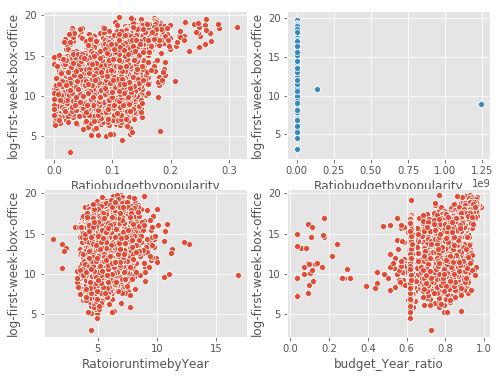

In [118]:
plt.figure(figsize=(8, 6))
#plt.subplot(2, 2, 1)
#plt.scatter(train['popularity'], train['first_week_box_office'])
#plt.xlabel('popularity')
#plt.ylabel('log-first-week-box-office')
#plt.title('Log box-office vs popularity');
#plt.subplot(2, 2, 2)
#plt.scatter(train['runtime'], train['first_week_box_office'])
#plt.xlabel('run-time')
#plt.ylabel('log-first-week-box-office')
#plt.title('Log box-office vs Run-time');
#plt.subplot(2, 2, 3)
plt.subplot(2,2,1)
sns.scatterplot(train['RatiopopularitybyYear']*100, train['first_week_box_office'])
plt.xlabel('Ratiobudgetbypopularity')
plt.ylabel('log-first-week-box-office')
plt.subplot(2,2,2)
sns.scatterplot(train['budget_runtime_ratio']*100, train['first_week_box_office'])
plt.xlabel('budget_runtime_ratio')
plt.ylabel('log-first-week-box-office')
sns.scatterplot(train['Ratiobudgetbypopularity']*100, train['first_week_box_office'])
plt.xlabel('Ratiobudgetbypopularity')
plt.ylabel('log-first-week-box-office')
plt.subplot(2,2,3)
sns.scatterplot(train['RatoioruntimebyYear']*100, train['first_week_box_office'])
plt.xlabel('RatoioruntimebyYear')
plt.ylabel('log-first-week-box-office')
plt.subplot(2,2,4)
sns.scatterplot(train['budget_Year_ratio']*100, train['first_week_box_office'])
plt.xlabel('budget_Year_ratio')
plt.ylabel('log-first-week-box-office')

In [119]:
train['RatiopopularitybyYear']

0       0.001005
1       0.001110
2       0.002075
3       0.001051
4       0.000540
5       0.001036
6       0.000866
7       0.001231
8       0.001540
9       0.001327
10      0.001536
11      0.000994
12      0.000817
13      0.001002
14      0.001254
15      0.001284
16      0.001108
17      0.001082
18      0.000419
19      0.001063
20      0.000408
21      0.000836
22      0.001228
23      0.001032
24      0.001087
25      0.001411
26      0.000948
27      0.001324
28      0.001105
29      0.001182
          ...   
6096    0.001469
6097    0.001520
6098    0.000377
6099    0.001119
6100    0.001306
6101    0.001240
6102    0.001133
6103    0.001330
6104    0.000513
6105    0.001159
6106    0.001348
6107    0.001386
6108    0.000438
6109    0.001611
6110    0.001136
6111    0.000912
6112    0.001282
6113    0.001269
6114    0.001026
6115    0.001115
6116    0.000548
6117    0.000701
6118    0.001006
6119    0.001110
6120    0.001707
6121    0.001197
6122    0.000974
6123    0.0011

In [120]:
features = ['id','budget', 
            'popularity', 
            'runtime', 
            'nb_spoken_languages', 
            'nb_production_companies',
            'english_spoken', 
            'language',
            'Day',
            'quarter', 'Year', 
            'Month2', 'Month3',  'Month4', 'Month5',  'Month6', 'Month7',
            'Ratiobudgetbypopularity', 'RatiopopularitybyYear',
            'RatoioruntimebyYear', 'budget_runtime_ratio', 'budget_Year_ratio',
            'Month8', 'Month9',  'Month10', 'Month11', 'Month12','first_week_box_office','cast_score','crew_score']

In [121]:
train['Month'].head()

0     2
1     8
2    10
3     8
4     1
Name: Month, dtype: int64

In [122]:
my_genres = [g for g in genres if g != 'TV Movie']

In [123]:
my_genres

['Comedy',
 'Drama',
 'Family',
 'Romance',
 'Horror',
 'Thriller',
 'Documentary',
 'Action',
 'Music',
 'Adventure',
 'Crime',
 'Science Fiction',
 'Mystery',
 'Foreign',
 'Animation',
 'Fantasy',
 'War',
 'Western',
 'History']

In [124]:
features += [col for col in train.columns if 'dayofweek' in col and col != "dayofweek"]
features += my_genres[:-1]
features += ['production_companies_reduced_{}'.format(i) for i in range(n_comp_production_companies)]
features += ['production_countries_reduced_{}'.format(i) for i in range(n_comp_production_countries)]

In [125]:
X = train[features]

In [126]:
X.columns

Index(['id', 'budget', 'popularity', 'runtime', 'nb_spoken_languages',
       'nb_production_companies', 'english_spoken', 'language', 'Day',
       'quarter', 'Year', 'Month2', 'Month3', 'Month4', 'Month5', 'Month6',
       'Month7', 'Ratiobudgetbypopularity', 'RatiopopularitybyYear',
       'RatoioruntimebyYear', 'budget_runtime_ratio', 'budget_Year_ratio',
       'Month8', 'Month9', 'Month10', 'Month11', 'Month12',
       'first_week_box_office', 'cast_score', 'crew_score', 'dayofweek1',
       'dayofweek2', 'dayofweek3', 'dayofweek4', 'dayofweek5', 'dayofweek6',
       'Comedy', 'Drama', 'Family', 'Romance', 'Horror', 'Thriller',
       'Documentary', 'Action', 'Music', 'Adventure', 'Crime',
       'Science Fiction', 'Mystery', 'Foreign', 'Animation', 'Fantasy', 'War',
       'Western', 'production_companies_reduced_0',
       'production_companies_reduced_1', 'production_companies_reduced_2',
       'production_countries_reduced_0', 'production_countries_reduced_1',
       'produc

In [127]:
X.shape

(6126, 60)

In [128]:
X.to_csv('preprocessed_final_code.csv',index=False)

In [129]:
X_1=X[:6000]
X_2=X[6000:]

In [130]:
X_1.shape

(6000, 60)

In [131]:
X_2.shape

(126, 60)

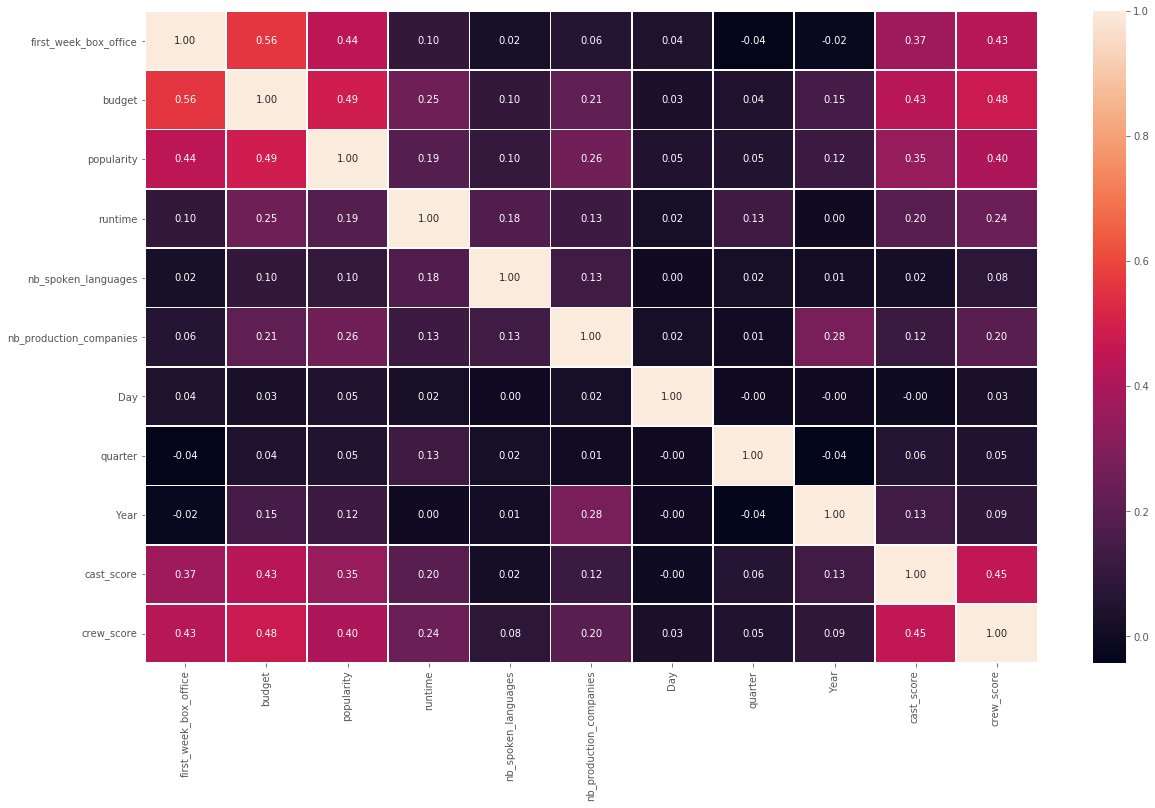

In [132]:
cor_features = X[['first_week_box_office', 'budget',  'popularity', 'runtime', 'nb_spoken_languages', 'nb_production_companies',
            'Day', 'quarter', 'Year','cast_score','crew_score']]
f,ax = plt.subplots(figsize=(20, 12))
sns.heatmap(cor_features.corr(), annot=True, linewidths=.7, fmt= '.2f',ax=ax)
plt.show()

In [133]:
X_temp=X
X = X_1.drop(['first_week_box_office','id'], axis = 1)
y = X_1.first_week_box_office


In [134]:
X = X.loc[:,~X.columns.duplicated()]


In [135]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=12, shuffle=True)

In [136]:
X_train.columns

Index(['budget', 'popularity', 'runtime', 'nb_spoken_languages',
       'nb_production_companies', 'english_spoken', 'language', 'Day',
       'quarter', 'Year', 'Month2', 'Month3', 'Month4', 'Month5', 'Month6',
       'Month7', 'Ratiobudgetbypopularity', 'RatiopopularitybyYear',
       'RatoioruntimebyYear', 'budget_runtime_ratio', 'budget_Year_ratio',
       'Month8', 'Month9', 'Month10', 'Month11', 'Month12', 'cast_score',
       'crew_score', 'dayofweek1', 'dayofweek2', 'dayofweek3', 'dayofweek4',
       'dayofweek5', 'dayofweek6', 'Comedy', 'Drama', 'Family', 'Romance',
       'Horror', 'Thriller', 'Documentary', 'Action', 'Music', 'Adventure',
       'Crime', 'Science Fiction', 'Mystery', 'Foreign', 'Animation',
       'Fantasy', 'War', 'Western', 'production_companies_reduced_0',
       'production_companies_reduced_1', 'production_companies_reduced_2',
       'production_countries_reduced_0', 'production_countries_reduced_1',
       'production_countries_reduced_2'],
      dtyp

In [137]:
X_test.columns

Index(['budget', 'popularity', 'runtime', 'nb_spoken_languages',
       'nb_production_companies', 'english_spoken', 'language', 'Day',
       'quarter', 'Year', 'Month2', 'Month3', 'Month4', 'Month5', 'Month6',
       'Month7', 'Ratiobudgetbypopularity', 'RatiopopularitybyYear',
       'RatoioruntimebyYear', 'budget_runtime_ratio', 'budget_Year_ratio',
       'Month8', 'Month9', 'Month10', 'Month11', 'Month12', 'cast_score',
       'crew_score', 'dayofweek1', 'dayofweek2', 'dayofweek3', 'dayofweek4',
       'dayofweek5', 'dayofweek6', 'Comedy', 'Drama', 'Family', 'Romance',
       'Horror', 'Thriller', 'Documentary', 'Action', 'Music', 'Adventure',
       'Crime', 'Science Fiction', 'Mystery', 'Foreign', 'Animation',
       'Fantasy', 'War', 'Western', 'production_companies_reduced_0',
       'production_companies_reduced_1', 'production_companies_reduced_2',
       'production_countries_reduced_0', 'production_countries_reduced_1',
       'production_countries_reduced_2'],
      dtyp

In [138]:
y_test

1671    15.762896
120     11.401692
395     16.438580
2776    16.053945
2642    15.387423
2600     8.566935
4142    15.872004
5941    16.556423
610     11.057393
3194    16.411388
5575     9.573941
5129    16.894879
77      15.907945
3022    17.138791
1859    10.827012
3455     9.382022
2663    12.509424
3095    10.358822
2454    15.513230
553     17.059755
3688    15.615290
1422    14.647330
3564    18.010056
5794     8.968396
4691    18.160723
2027    17.409796
3060    14.016998
3556    11.529861
43      16.956053
4056    15.241896
          ...    
4715    13.581909
4215     9.853141
2800    15.851379
3932    16.068575
5987     7.914618
2079     9.416948
5507    16.056895
4822    18.135719
190     15.461787
4824    13.315973
3023    17.894385
5621    10.951753
4399    12.098732
5844    12.627851
307     10.238709
619     15.658863
96      16.303553
5082     9.293578
1018    13.800091
3360    15.522086
2774    15.378405
4149     9.396571
3877     9.100191
2106     9.494466
3348    16

In [139]:
##Modelling

In [140]:
params = {'objective': 'reg:linear', 
          'eta': 0.01, 
          'max_depth': 6, 
          'min_child_weight': 3,
          'subsample': 0.8,
          'colsample_bytree': 0.8,
          'colsample_bylevel': 0.50, 
          'gamma': 1.45, 
          'eval_metric': 'rmse', 
          'seed': 12, 
          'silent': True    
}

In [141]:
xgb_data = [(xgb.DMatrix(X_train, y_train), 'train'), (xgb.DMatrix(X_test, y_test), 'valid')]

In [142]:
print('Starting training...')
# train
xgb_model = xgb.train(params, 
                  xgb.DMatrix(X_train, y_train),
                  5000,  
                  xgb_data, 
                  verbose_eval=200,
                  early_stopping_rounds=200)

Starting training...
[0]	train-rmse:13.5107	valid-rmse:13.5086
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 200 rounds.
[200]	train-rmse:2.50718	valid-rmse:2.6361
[400]	train-rmse:1.55968	valid-rmse:1.89234
[600]	train-rmse:1.43219	valid-rmse:1.87096
[800]	train-rmse:1.34347	valid-rmse:1.86854
Stopping. Best iteration:
[783]	train-rmse:1.35026	valid-rmse:1.8682



In [143]:
import pickle
pickle.dump(xgb_model, open("xgb_model.dat", "wb"))

In [144]:
xgb_model_full = xgb.XGBRegressor(objective  = 'reg:linear', 
          eta = 0.01, 
          max_depth = 6,
          min_child_weight = 3,
          subsample = 0.8, 
          colsample_bytree = 0.8,
          colsample_bylevel = 0.50, 
          gamma = 1.45, 
          eval_metric = 'rmse',
          seed = 12, n_estimators = 2000)

In [145]:
xgb_model_full.fit (X, y)

[17:11:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
             colsample_bynode=1, colsample_bytree=0.8, eta=0.01,
             eval_metric='rmse', gamma=1.45, importance_type='gain',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=3, missing=None, n_estimators=2000, n_jobs=1,
             nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=12, silent=None,
             subsample=0.8, verbosity=1)

In [146]:
pickle.dump(xgb_model_full, open("xgb_model_full.dat", "wb"))

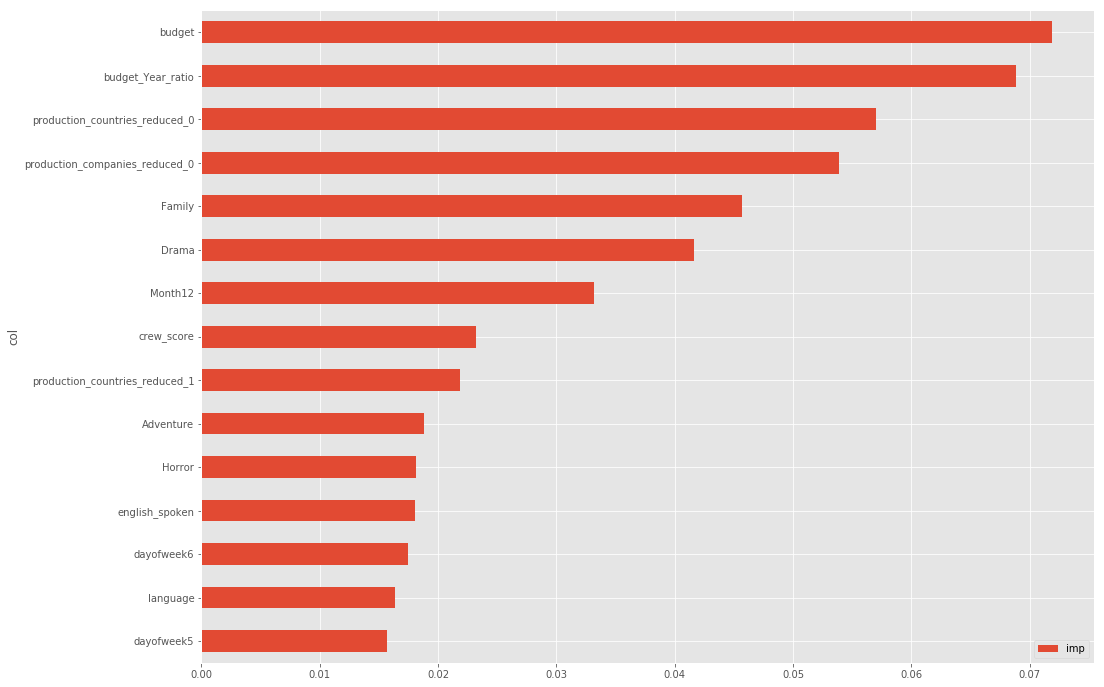

In [147]:
fea_imp = pd.DataFrame({'imp': xgb_model_full.feature_importances_, 'col': X.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-15:]
fea_imp.plot(kind='barh', x='col', y='imp', figsize=(16, 12))
plt.savefig('xgbboost_feature_importance.png')

In [148]:
catmodel = catb.CatBoostRegressor(iterations=10000, 
                                 learning_rate=0.01, 
                                 depth=5, 
                                 eval_metric='RMSE',
                                 colsample_bylevel=0.7,
                                 bagging_temperature = 0.2,
                                 metric_period = None,
                                 early_stopping_rounds=200,
                                 random_seed=12)

In [149]:
ti=time.time()
catmodel.fit(X_train, y_train, 
             eval_set=(X_test, y_test), 
             verbose=500, 
             use_best_model=True)

print("Number of minutes of training of model_cal = {:.2f}".format((time.time()-ti)/60))

cat_pred_train=catmodel.predict(X)
cat_pred_train[cat_pred_train<0]=0

0:	learn: 13.9963551	test: 13.9934775	best: 13.9934775 (0)	total: 61.5ms	remaining: 10m 14s
500:	learn: 1.9143303	test: 1.9795040	best: 1.9795040 (500)	total: 3.01s	remaining: 57s
1000:	learn: 1.8289821	test: 1.9201406	best: 1.9201406 (1000)	total: 5.91s	remaining: 53.1s
1500:	learn: 1.7927430	test: 1.9039912	best: 1.9039862 (1497)	total: 8.96s	remaining: 50.7s
2000:	learn: 1.7709119	test: 1.8988120	best: 1.8987431 (1980)	total: 11.4s	remaining: 45.7s
2500:	learn: 1.7509032	test: 1.8970125	best: 1.8968307 (2484)	total: 13.9s	remaining: 41.6s
3000:	learn: 1.7385221	test: 1.8958334	best: 1.8956620 (2976)	total: 16.4s	remaining: 38.4s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 1.895466171
bestIteration = 3212

Shrink model to first 3213 iterations.
Number of minutes of training of model_cal = 0.34


In [150]:
pickle.dump(catmodel, open("catmodel.dat", "wb"))

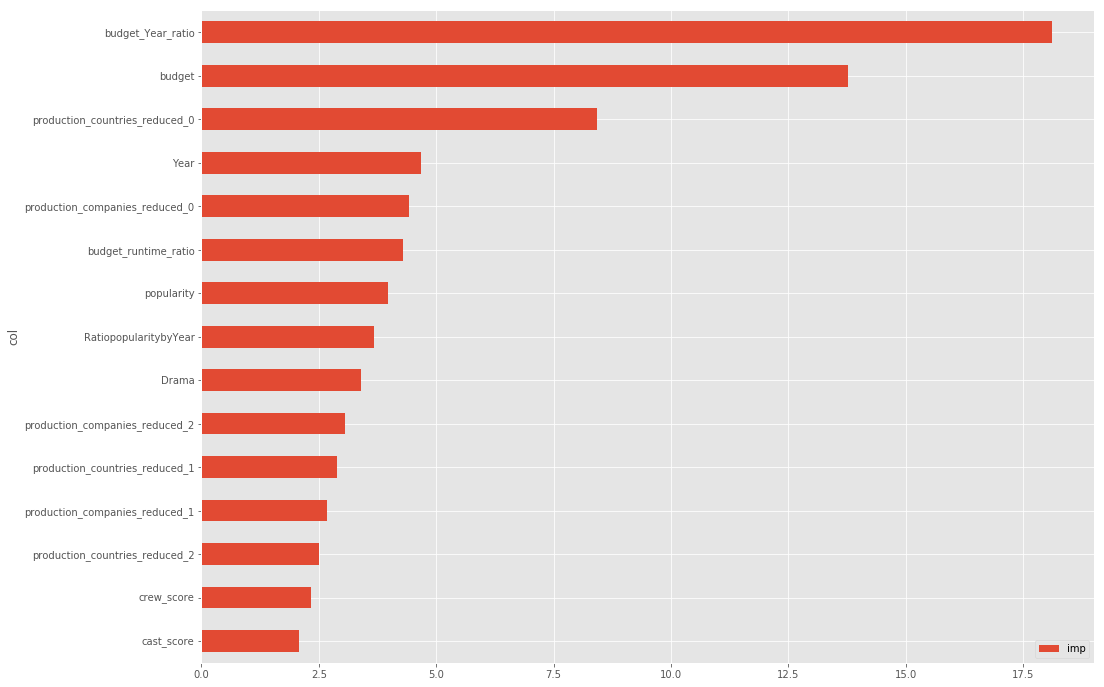

In [151]:
fea_imp = pd.DataFrame({'imp': catmodel.feature_importances_, 'col': X.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-15:]
fea_imp.plot(kind='barh', x='col', y='imp', figsize=(16, 12))
plt.savefig('catboost_feature_importance.png')

In [152]:
n_fold = 10
folds = KFold(n_splits=n_fold, shuffle=True, random_state=42)

In [158]:
def train_model(X, X_test, y, params=None, folds=folds, model_type='lgb', plot_feature_importance=False, model=None):

    oof = np.zeros(X.shape[0])
    prediction = np.zeros(X_test.shape[0])
    scores = []
    feature_importance = pd.DataFrame()
    for fold_n, (train_index, valid_index) in enumerate(folds.split(X)):
        #print(train_index)
        #print(valid_index)
        print('Fold', fold_n, 'started at', time.ctime())
        if model_type == 'sklearn':
            X_train, X_valid = X.values[train_index], X.values[valid_index]
        else:
            X_train, X_valid = X.values[train_index], X.values[valid_index]
        y_train, y_valid = y.values[train_index], y.values[valid_index]
        
        #print(X_train.shape)
        #print(X_valid.shape)
        #print(X_train[0,:])
        if model_type == 'lgb':
            model = lgb.LGBMRegressor(**params, n_estimators = 20000, nthread = 4, n_jobs = -1)
            model.fit(X_train, y_train, 
                    eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric='rmse',
                    verbose=1000, early_stopping_rounds=200)
            
            y_pred_valid = model.predict(X_valid)
            y_pred = model.predict(X_test, num_iteration=model.best_iteration_)
            
        if model_type == 'xgb':
            train_data = xgb.DMatrix(data=X_train, label=y_train)
            valid_data = xgb.DMatrix(data=X_valid, label=y_valid)

            watchlist = [(train_data, 'train'), (valid_data, 'valid_data')]
            model = xgb.train(dtrain=train_data, num_boost_round=20000, evals=watchlist, early_stopping_rounds=200, verbose_eval=500, params=params)
            y_pred_valid = model.predict(xgb.DMatrix(X_valid), ntree_limit=model.best_ntree_limit)
            y_pred = model.predict(xgb.DMatrix(X_test.values), ntree_limit=model.best_ntree_limit)

        if model_type == 'sklearn':
            model = model
            model.fit(X_train, y_train)
            y_pred_valid = model.predict(X_valid).reshape(-1,)
            score = mean_squared_error(y_valid, y_pred_valid)
            
            y_pred = model.predict(X_test)
            
        if model_type == 'cat':
            model = catb.CatBoostRegressor(iterations=20000,  eval_metric='RMSE', **params)
            model.fit(X_train, y_train, eval_set=(X_valid, y_valid), cat_features=[], use_best_model=True, verbose=False)

            y_pred_valid = model.predict(X_valid)
            y_pred = model.predict(X_test)
        
        oof[valid_index] = y_pred_valid.reshape(-1,)
        scores.append(mean_squared_error(y_valid, y_pred_valid) ** 0.5)
        
        prediction += y_pred    
        
        if model_type == 'lgb'or model_type=='cat' or model_type== 'xgb':
            # feature importance
            fold_importance = pd.DataFrame()
            fold_importance["feature"] = X.columns
            fold_importance["importance"] = model.feature_importances_
            fold_importance["fold"] = fold_n + 1
            feature_importance = pd.concat([feature_importance, fold_importance], axis=0)

    prediction /= n_fold
    
    print('CV mean score: {0:.4f}, std: {1:.4f}.'.format(np.mean(scores), np.std(scores)))
    
    if model_type == 'lgb'or model_type=='cat' or model_type== 'xgb':
        feature_importance["importance"] /= n_fold
        if plot_feature_importance:
            cols = feature_importance[["feature", "importance"]].groupby("feature").mean().sort_values(
                by="importance", ascending=False)[:15].index

            best_features = feature_importance.loc[feature_importance.feature.isin(cols)]

            plt.figure(figsize=(16, 12));
            sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False));
            if model_type=='lgb':
                plt.title('LGB Features (avg over folds)');
                plt.savefig('LGB_feature_importance.png')
            elif model_type=='cat':
                plt.title('cat Features (avg over folds)');
                plt.savefig('cat_feature_importance.png')
            else:
                plt.title('xgb Features (avg over folds)');
                plt.savefig('xgb_feature_importance.png')
            #plt.title('LGB Features (avg over folds)');
            #plt.savefig('LGB_feature_importance.png')
        
            return oof, prediction, feature_importance,model
        return oof, prediction,model
    
    else:
        return oof, prediction,model

In [154]:
#X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.2, random_state=12, shuffle=True)

In [155]:
params = {'num_leaves': 80,
         'min_data_in_leaf': 20,
         'objective': 'regression',
         'max_depth': 7,
         'learning_rate': 0.01,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.2,
         "verbosity": -1}
model1 = lgb.LGBMRegressor(**params, n_estimators = 20000, nthread = 4, n_jobs = -1)
model1.fit(X_train, y_train, 
        eval_set=[(X_train, y_train), (X_test, y_test)], eval_metric='rmse',
        verbose=1000, early_stopping_rounds=200)

Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[477]	training's rmse: 1.4271	valid_1's rmse: 1.88033


LGBMRegressor(bagging_fraction=0.9, bagging_freq=1, bagging_seed=11,
              boosting='gbdt', boosting_type='gbdt', class_weight=None,
              colsample_bytree=1.0, feature_fraction=0.9,
              importance_type='split', lambda_l1=0.2, learning_rate=0.01,
              max_depth=7, metric='rmse', min_child_samples=20,
              min_child_weight=0.001, min_data_in_leaf=20, min_split_gain=0.0,
              n_estimators=20000, n_jobs=-1, nthread=4, num_leaves=80,
              objective='regression', random_state=None, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0, verbosity=-1)

Fold 0 started at Sun Aug 11 17:12:19 2019
Training until validation scores don't improve for 200 rounds.
[1000]	training's rmse: 1.27791	valid_1's rmse: 1.83851
Early stopping, best iteration is:
[960]	training's rmse: 1.29266	valid_1's rmse: 1.8369
Fold 1 started at Sun Aug 11 17:12:22 2019
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[752]	training's rmse: 1.375	valid_1's rmse: 1.86377
Fold 2 started at Sun Aug 11 17:12:25 2019
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[576]	training's rmse: 1.45772	valid_1's rmse: 1.85183
Fold 3 started at Sun Aug 11 17:12:28 2019
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[634]	training's rmse: 1.43643	valid_1's rmse: 1.74586
Fold 4 started at Sun Aug 11 17:12:30 2019
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[458]	training's rmse:

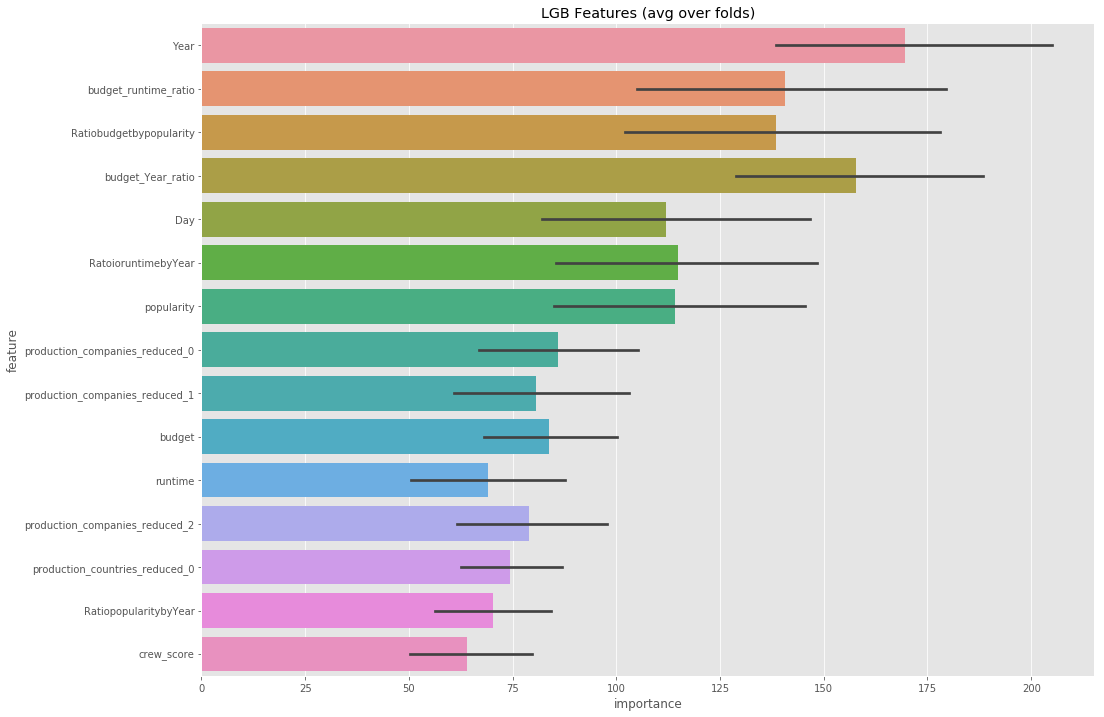

In [156]:
params = {'num_leaves': 30,
         'min_data_in_leaf': 20,
         'objective': 'regression',
         'max_depth': 9,
         'learning_rate': 0.01,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.2,
         "verbosity": -1}
oof_lgb, prediction_lgb,_,lgb_model = train_model(X_train, X_test, y_train, params=params, model_type='lgb', plot_feature_importance=True)

In [163]:
parames_cat={
              'learning_rate':0.01, 
              'depth':5, 
              'eval_metric':'RMSE',
              'colsample_bylevel':0.7,
              'bagging_temperature' : 0.2,
              'metric_period' : None,
              'early_stopping_rounds':200,
              'random_seed':12
}

In [165]:
oof_cat, prediction_cat,_,cat_model = train_model(X_train, X_test, y_train, params=parames_cat, model_type='cat', plot_feature_importance=True)


Fold 0 started at Sun Aug 11 17:20:42 2019


TypeError: type object got multiple values for keyword argument 'eval_metric'

In [ ]:
oof_xgb, prediction_xgb,_,xgb_model = train_model(X_train, X_test, y_train, params=params, model_type='xgb', plot_feature_importance=True)

In [ ]:
#lgb_model.predict(X_train)

In [ ]:
#y_train[:10]

In [ ]:
pickle.dump(lgb_model, open("lgb_model.dat", "wb"))

In [ ]:
#X_train_2, X_test_2, y_train_2, y_test_2= train_test_split(X, y, test_size=0.2, random_state=12, shuffle=True)

In [ ]:
#model2, history1 = model2(X_train_2, y_train_2, X_test_2, y_test_2)
#model2.summary()

In [ ]:
'''acc = history1.history['mean_squared_error']
val_acc = history1.history['val_mean_squared_error']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training')
plt.plot(epochs, val_acc, 'r', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('MSLE')
plt.legend()
plt.show()'''

In [ ]:
#model2.save('neural_network_model.h5')

In [ ]:
#X=X_temp.drop(['first_week_box_office'],axis=1)
#y=X_temp['first_week_box_office']

In [ ]:
#X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=12, shuffle=True)

In [ ]:
#X_train.head()

In [ ]:
#X_test.shape

In [ ]:
result_X_train_1 = catmodel.predict(X_train)
result_X_test_1 = catmodel.predict(X_test) 

In [ ]:
result_X_train_2 = xgb_model_full.predict(X_train)
result_X_test_2 = xgb_model_full.predict(X_test) 

In [ ]:
#model2

In [ ]:
result_X_train_3 = lgb_model.predict(X_train)
result_X_test_3 = lgb_model.predict(X_test) 

In [ ]:
from keras import models, layers, regularizers, optimizers

In [ ]:
training_data_ensemble = pd.DataFrame({'result1':result_X_train_1.reshape(result_X_train_1.shape[0]),
                                       'result2':result_X_train_2.reshape(result_X_train_2.shape[0]),
                                       'result3':result_X_train_3.reshape(result_X_train_3.shape[0]),
                                       })
training_Y_ensemble = y_train
#training_Y_ensemble = Y_0

validation_data_ensemble = pd.DataFrame({'result1':result_X_test_1.reshape(result_X_test_1.shape[0]),
                                         'result2':result_X_test_2.reshape(result_X_test_2.shape[0]),
                                         'result3':result_X_test_3.reshape(result_X_test_3.shape[0]),
                                         })
validation_Y_ensemble = y_test

#Create the Ensemble model
model_e = models.Sequential()
model_e.add(layers.Dense(356, activation='relu', input_shape=(training_data_ensemble.shape[1],)))
model_e.add(layers.Dropout(0.1))
model_e.add(layers.Dense(256, activation='relu'))
model_e.add(layers.Dense(10,activation='relu'))
model_e.add(layers.Dense(1))    
model_e.compile(optimizer=optimizers.rmsprop(lr=1e-5),loss='mse',metrics=['mean_squared_error'])
history_e = model_e.fit(training_data_ensemble, training_Y_ensemble, epochs=40, batch_size = 32,
                         validation_data=(validation_data_ensemble, validation_Y_ensemble))

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history_e.history['mean_squared_error']
val_acc = history_e.history['val_mean_squared_error']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training')
plt.plot(epochs, val_acc, 'r', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('MSLE')
plt.legend()
plt.show()

In [ ]:
model_e.save('ensembled_result.h5')

In [ ]:
#Testing starts here

In [ ]:
X_2.shape

In [ ]:
X_train.shape

In [ ]:
X_predict=X_2.drop(['first_week_box_office','id'],axis=1)
y_predict=X_2['first_week_box_office']

In [ ]:
X.shape

In [ ]:
X_predict.shape

In [ ]:
result_1=catmodel.predict(X_predict)

In [ ]:
result_2=xgb_model_full.predict(X_predict)

In [ ]:
result_3=lgb_model.predict(X_predict)

In [ ]:
validation_data_ensemble = pd.DataFrame({'result1':result_1.reshape(result_1.shape[0]),
                                         'result2':result_2.reshape(result_2.shape[0]),
                                         'result3':result_3.reshape(result_3.shape[0]),
                                         })

In [ ]:
final_result=model_e.predict(validation_data_ensemble)

In [ ]:
val=np.expm1(final_result)

In [ ]:
exp_val=np.expm1(y_predict)

In [ ]:
exp_val_1=np.expm1(result_1)

In [ ]:
error=((result_1-y_predict)*(result_1-y_predict)).sum()

In [ ]:
print(error)

In [ ]:
#print(result_1[:10])
#print(result_2[:10])
#print(result_3[:10])
#print(y_predict[:10])